In [15]:
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Import data

### EDF

In [49]:
tr_input = pd.read_csv("../data_EDF/training_inputs.csv", sep = ";")
output = pd.read_csv("../data_EDF/challenge_output_data_training_file_predict"
                     "_which_clients_reduced_their_consumption.csv", sep = ";")
data_edf = pd.merge(left=tr_input, right=output, how='left', on="ID")

In [80]:
sum(data_edf['COD_INSEE'].isnull())

1727

In [84]:
for s in data_edf.columns:
    print(s)

ID
COD_INSEE
COD_IRIS
C1
C2
C3
C4
C5
C6
C7
C8
C9
C10
C11
C12
C13
C14
C15
C16
C17
C18
C19
S1
S2
S3
S4
S5
S6
S7
S8
S9
S10
S11
S12
Q1
Q2
Q3
Q4
Q5
Q6
Q7
Q8
Q9
Q10
Q11
Q12
Q13
Q14
Q15
Q16
Q17
Q18
Q19
Q20
Q21
Q22
Q23
Q24
Q25
Q26
Q27
Q28
Q29
Q30
Q31
Q32
Q33
Q34
Q35
Q36
Q37
Q38
Q39
Q40
Q41
Q42
Q43
Q44
Q45
Q46
Q47
Q48
Q49
Q50
Q51
Q52
Q53
Q54
Q55
Q56
Q57
Q58
Q59
Q60
Q61
Q62
Q63
Q64
Q65
Q66
Q67
Q68
Q69
Q70
Q71
Q72
Q73
Q74
Q75
TARGET


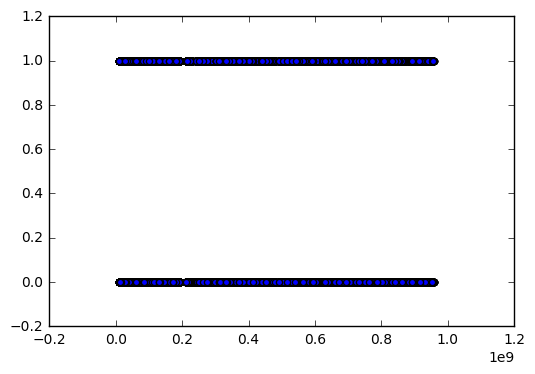

In [87]:
plt.scatter(data_edf['COD_IRIS'], data_edf['TARGET'])

### ENEDIS

In [48]:
data_enedis = pd.read_csv("../data_EDF/consommation-electrique-par-secteurs-dactivite.csv", sep = ";")

C:\Users\Hippo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [59]:
for s in data_enedis.columns:
    print(s)

INSEE REGI
INSEE DEPT
INSEE EPCI
INSEE COMM
INSEE IRIS
Maille géographique
Année
Nom IRIS
Code IRIS
Type IRIS
Nom commune
Code commune
Nom EPCI
Code EPCI
Type EPCI
Nom département
Code département
Nom région
Code région
Nb sites secteur résidentiel Enedis
Conso totale secteur résidentiel Enedis (MWh)
Conso moyenne secteur résidentiel Enedis (MWh)
Nb sites Agriculture Enedis
Conso totale Agriculture Enedis (MWh)
Nb sites Industrie Enedis
Conso totale Industrie Enedis (MWh)
Nb sites Tertiaire Enedis
Conso totale Tertiaire Enedis (MWh)
Nb sites Secteur non affecté Enedis
Conso totale Secteur non affecté Enedis (MWh)
Geo Point
Geo Shape


In [58]:
sum(data_enedis["INSEE IRIS"]!=data_enedis['Code IRIS'])

11456

##### Clean dataset

In [61]:
to_keep = ['Code IRIS', 
           'Nb sites secteur résidentiel Enedis', 
           'Conso totale secteur résidentiel Enedis (MWh)', 
           'Conso moyenne secteur résidentiel Enedis (MWh)']
data_enedis_kept = data_enedis[to_keep]
data_enedis_kept = data_enedis_kept.dropna()

### Merge datasets

In [64]:
data = pd.merge(left=data_edf, right=data_enedis_kept, how='left', left_on="COD_INSEE", right_on="Code IRIS")

In [65]:
data.shape

(20441064, 114)

In [66]:
data.head()

,ID,COD_INSEE,COD_IRIS,C1,C2,C3,C4,C5,C6,C7,...,Q71,Q72,Q73,Q74,Q75,TARGET,Code IRIS,Nb sites secteur résidentiel Enedis,Conso totale secteur résidentiel Enedis (MWh),Conso moyenne secteur résidentiel Enedis (MWh)
0,0,92025.0,920250102.0,EA,RA,C,IB,0,0,0,...,false,false,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1,1,17359.0,173590000.0,EA,RA,C,IA,0,0,0,...,false,false,True,False,False,0,NaN,NaN,NaN,NaN
2,2,48156.0,481560000.0,EA,RC,B,IA,0,0,0,...,false,false,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,3,82125.0,821250000.0,EA,RA,C,IB,0,0,0,...,false,false,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
4,4,64422.0,644220102.0,EA,RA,B,IB,0,0,0,...,false,false,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
